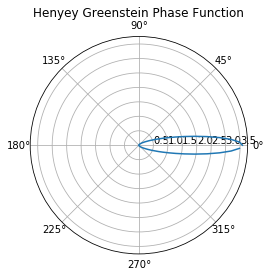

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def phase_func(r, g):
    return (1 - g * g) / (4 * np.pi) / pow((1 + g * g - 2 * g * np.cos(r)), 3.0 / 2.0)

r = np.arange(0, 2, 0.01)
theta = phase_func(r*np.pi, 0.8)

ax = plt.subplot(111, projection='polar')
ax.plot(r*np.pi, theta)
#ax.set_rmax(4)
#ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(0)  # get radial labels away from plotted line
ax.grid(True)

ax.set_title("Henyey Greenstein Phase Function", va='bottom')
plt.show()